In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


## 데이터 불러오기
- train.csv 파일을 불러온다.


In [3]:
train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


### 텍스트 데이터 분석(자연어처리) 사전작업
- 불필요한 단어들 제거
- 문장을 단어별로 쪼개기
- 단어를 숫자로 변환하기

## 머신러닝의 종류
- 수치를 예측 : 키가 200이면 몸무게가 몇일까?
- 범주를 예측 : 키가 200이면 남자일까? 여자일까?
- target 0이면, 가짜뉴스, 1이면 진짜뉴스

In [5]:
# 시각화 코드 작성
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

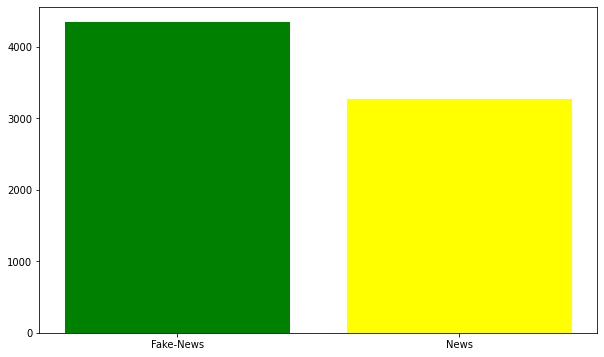

In [6]:
import matplotlib.pyplot as plt
result = train['target'].value_counts()
labels = ['Fake-News', 'News']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, result, color = ['green', 'yellow'])
plt.show()

## 데이터분리
- target이 1일 때, 데이터 분리
- target이 0일 때, 데이터 분리

In [15]:
train[train['target'] == 1]['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 3271, dtype: object

Text(0.5, 1.0, 'News')

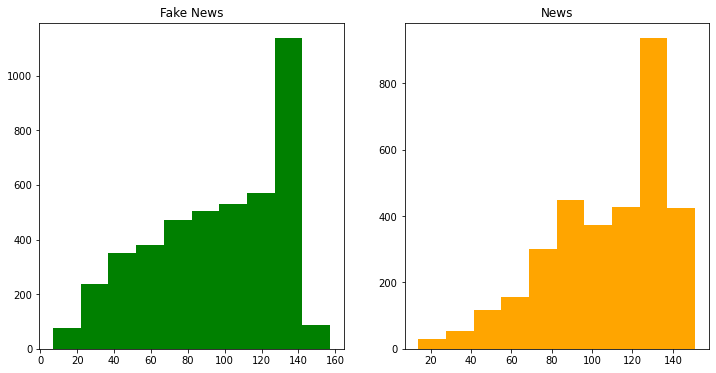

In [16]:
target_0 = train[train['target'] == 0]['text'].str.len()
target_1 = train[train['target'] == 1]['text'].str.len()
# target_1 = # 행추출

fig, ax = plt.subplots(1, 2, figsize=(12, 6)) # 한 이미지에 2가지 그래프 넣기
ax[0].hist(target_0, color = 'green')
ax[0].set_title('Fake News')

ax[1].hist(target_1, color = 'orange')
ax[1].set_title('News')


- 그룹간의 분포 비교 해주는 그래프 : 박스플롯

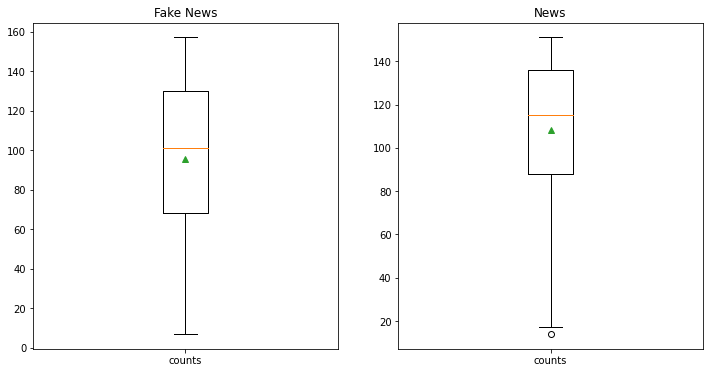

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Fake News
ax[0].boxplot(target_0, labels=['counts'], showmeans=True)
ax[0].set_title('Fake News')

# News
ax[1].boxplot(target_1, labels=['counts'], showmeans=True)
ax[1].set_title('News')

plt.show()

## 워드 클라우드
- 워드 클라우드 : 빈도분석(글자가 얼마나 자주 나오냐!)

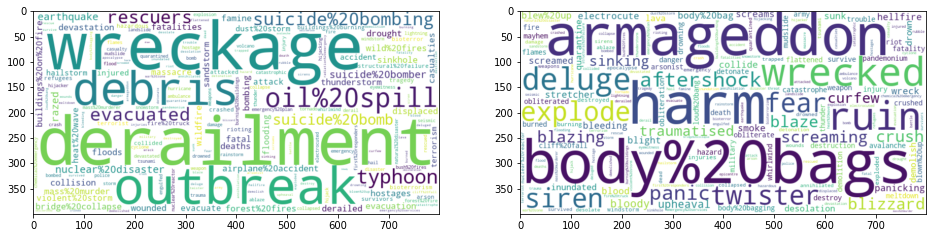

In [30]:
from wordcloud import WordCloud, STOPWORDS
# fakenews_keywords = 
fakenews_keywords = dict(train[train['target'] == 0]['keyword'].value_counts())
news_keywords = dict(train[train['target'] == 1]['keyword'].value_counts())

stopwords = set(STOPWORDS)
news_wc = WordCloud(stopwords = stopwords,
                    width=800,
                    height = 400,
                    background_color = 'white').generate_from_frequencies(news_keywords)


fakenews_wc = WordCloud(stopwords = stopwords,
                    width=800,
                    height = 400,
                    background_color = 'white').generate_from_frequencies(fakenews_keywords)

fig,ax = plt.subplots(1, 2, figsize=(16, 10))
ax[0].imshow(news_wc, interpolation = 'bilinear')
ax[1].imshow(fakenews_wc, interpolation = 'bilinear')
plt.show()